In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [487]:
pd.set_option('display.max_columns', None)

In [489]:
df = pd.read_csv('data_after_outlier_treatment.csv')

In [491]:
df.shape

(3586, 23)

In [493]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1028
agePossession             0
super_built_up_area    1710
built_up_area          1973
carpet_area            1739
study room                0
servant room              0
store room                0
puja room                 0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

# Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

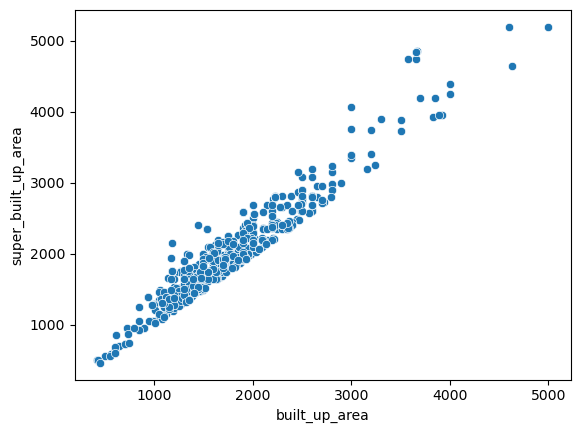

In [496]:
sns.scatterplot(x = df['built_up_area'], y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

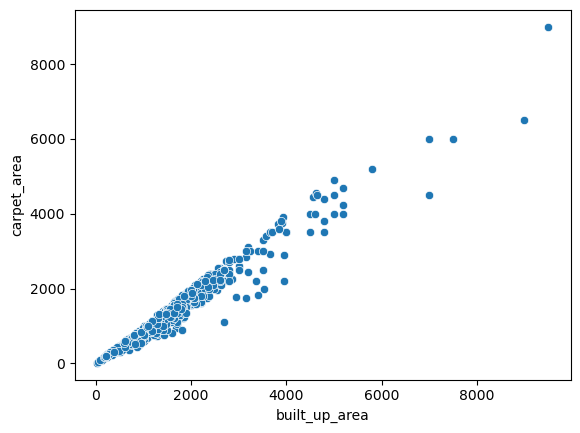

In [498]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'])

In [500]:
# Checking where all three areas are missing
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3581    False
3582    False
3583    False
3584    False
3585    False
Length: 3586, dtype: bool

In [502]:
# Checking which column has all three data present

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [504]:
all_present_df.shape

(531, 23)

In [506]:
all_present_df.sample(10)

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
944,ss the leaf,flat,sector 85,1.20,12371.0,970.0,Super Built up area 1671(155.24 sq.m.)Built Up...,2,2,2,4.0,East,Relatively New,1671.0,1190.0,970.0,0,1,1,0,0,0,81
188,shapoorji pallonji joyville gurugram,flat,sector 102,1.90,10259.0,1852.0,Super Built up area 1852(172.06 sq.m.)Built Up...,3,3,3+,15.0,North-East,New Property,1852.0,1700.0,1450.0,0,0,0,0,0,0,174
3583,orris aster court premier,flat,sector 85,1.49,5820.0,2560.0,Super Built up area 2560(237.83 sq.m.)Built Up...,4,5,3+,10.0,East,Relatively New,2560.0,2017.0,1890.0,0,1,0,0,0,1,84
1779,orchid petals,flat,sector 49,2.35,11559.0,2033.0,Super Built up area 2033(188.87 sq.m.)Built Up...,3,3,3,15.0,West,Relatively New,2033.0,2030.0,1750.0,0,0,0,0,1,0,49
2057,ss the leaf,flat,sector 85,1.87,7780.0,2404.0,Super Built up area 2408(223.71 sq.m.)Built Up...,3,4,3,7.0,North-East,Relatively New,2408.0,2225.0,2175.0,0,0,0,0,0,0,49
2473,la vida by tata housing,flat,sector 113,3.35,16750.0,2000.0,Super Built up area 2691(250 sq.m.)Built Up ar...,3,4,3+,12.0,North-East,New Property,2691.0,2200.0,2000.0,1,1,0,0,0,0,174
1886,orris aster court premier,flat,sector 85,1.25,5896.0,2120.0,Super Built up area 2120(196.95 sq.m.)Built Up...,3,4,2,5.0,North,Relatively New,2120.0,1900.0,1800.0,0,1,0,0,0,1,174
2481,paras dews,flat,sector 106,1.35,7297.0,1850.0,Super Built up area 2355(218.79 sq.m.)Built Up...,4,4,3+,18.0,North-East,Relatively New,2355.0,2100.0,1850.0,0,1,0,0,0,1,174
154,paras dews,flat,sector 106,1.15,6534.0,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3,4,3+,12.0,East,Relatively New,1760.0,1186.0,1130.0,1,1,0,0,0,1,174
3467,m3m woodshire,flat,sector 107,1.30,8922.0,1457.0,Super Built up area 1943(180.51 sq.m.)Built Up...,3,3,3+,4.0,West,Relatively New,1943.0,1554.0,1457.0,0,0,0,0,0,1,174


In [508]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [510]:
x = all_present_df[['super_built_up_area']]
y = all_present_df[['built_up_area']]
x

,super_built_up_area
0,1665.0
28,2727.0
31,2069.0
33,2217.0
34,1326.0
...,...
3551,1800.0
3556,2150.0
3566,1850.0
3579,1110.0


In [512]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 42)

In [514]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [516]:
y_pred = model.predict(x_test)

In [518]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 31304.72776257498
R² Score: 0.9171277654070638


In [520]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-15.90644063]
Coefficients: [[0.89584984]]


In [522]:
X = all_present_df[['carpet_area']]
Y = all_present_df[['built_up_area']]
X

,carpet_area
0,1034.0
28,2725.0
31,1800.0
33,1720.0
34,1050.0
...,...
3551,1600.0
3556,1350.0
3566,1500.0
3579,1000.0


In [524]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)

In [526]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)

LinearRegression()

In [528]:
Y_pred = model2.predict(X_test)

In [530]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 19104.667891995294
R² Score: 0.9494246833458059


In [532]:
print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)

Intercept: [185.80973251]
Coefficients: [[1.00164303]]


In [536]:
df1 = df[(df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull()) & ~(df['super_built_up_area'].isnull())]

In [538]:
df1['built_up_area'] = ((0.89584984 * df1['super_built_up_area'] - 15.90644063 ) + (1.00164303*df1['carpet_area'] + 185.80973251))/2

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_80085/1307361542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['built_up_area'] = ((0.89584984 * df1['super_built_up_area'] - 15.90644063 ) + (1.00164303*df1['carpet_area'] + 185.80973251))/2


In [540]:
df.update(df1)

In [542]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1028
agePossession             0
super_built_up_area    1710
built_up_area          1552
carpet_area            1739
study room                0
servant room              0
store room                0
puja room                 0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [544]:
df2 = df[(df['built_up_area'].isnull()) & (df['carpet_area'].isnull()) & ~(df['super_built_up_area'].isnull())]

In [546]:
df2

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
2,umang winter hills,flat,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,1,79
3,godrej nature plus,flat,sector 33 road,1.35,8670.0,1557.0,Super Built up area 1557(144.65 sq.m.),3,2,3+,17.0,NaN,New Property,1557.0,NaN,NaN,0,0,0,0,0,0,38
6,tulip leaf,flat,sector 69,2.06,11386.0,1809.0,Super Built up area 1812(168.34 sq.m.),3,3,3,16.0,South-West,Relatively New,1812.0,NaN,NaN,0,0,0,0,0,0,49
8,godrej oasis,flat,sector 88a,1.40,7567.0,1850.0,Super Built up area 1850(171.87 sq.m.),3,3,3+,4.0,East,Relatively New,1850.0,NaN,NaN,0,0,0,0,0,1,38
9,microtek greenburg,flat,sector 86,1.93,8446.0,2285.0,Super Built up area 2285(212.28 sq.m.),3,4,3,12.0,East,Relatively New,2285.0,NaN,NaN,0,1,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,m3m heights,flat,sector 65,2.50,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,19.0,NaN,Under Construction,1828.0,NaN,NaN,0,0,0,0,0,0,48
3576,m3m merlin,flat,sector 67,4.50,14267.0,3154.0,Super Built up area 3154(293.02 sq.m.),4,4,3+,15.0,South-West,Relatively New,3154.0,NaN,NaN,0,1,0,0,0,1,158
3577,conscient elevate,flat,sector 59,4.25,18518.0,2295.0,Super Built up area 2295(213.21 sq.m.),3,4,3,3.0,NaN,Under Construction,2295.0,NaN,NaN,0,0,0,0,0,0,0
3578,bestech park view spa next,flat,sector 67,2.70,11489.0,2350.0,Super Built up area 2350(218.32 sq.m.),4,4,3+,9.0,South-West,Moderately Old,2350.0,NaN,NaN,0,1,0,0,0,1,149


In [548]:
df2['built_up_area'] = (0.89584984 * df2['super_built_up_area'] - 15.90644063 )

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_80085/1108422712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['built_up_area'] = (0.89584984 * df2['super_built_up_area'] - 15.90644063 )


In [550]:
df.update(df2)

In [552]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1028
agePossession             0
super_built_up_area    1710
built_up_area           676
carpet_area            1739
study room                0
servant room              0
store room                0
puja room                 0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [554]:
df3 = df[(df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull()) & (df['super_built_up_area'].isnull())]

In [556]:
df3

,society,property_type,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
1,railway officers rpf society,flat,sector 9a,1.25,6921.0,1806.0,Carpet area: 1806 (167.78 sq.m.),4,3,3,1.0,NaN,Old Property,NaN,NaN,1806.000000,0,1,0,0,0,0,40
5,signature global park,flat,sohna road road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2,1,3,1.0,NaN,New Property,NaN,NaN,745.000000,0,0,0,0,0,0,65
10,emaar imperial gardens,flat,sector 102,1.98,9900.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,9.0,North,Relatively New,NaN,NaN,2000.000000,0,1,0,0,0,1,72
20,godrej,flat,sector 79,1.47,16256.0,904.0,Carpet area: 84.01,2,2,3,9.0,North-East,New Property,NaN,NaN,84.010000,1,0,0,0,0,0,99
26,vipul world,flat,sector 48,1.38,9482.0,1455.0,Carpet area: 1450 (134.71 sq.m.),3,3,1,2.0,NaN,Relatively New,NaN,NaN,1450.000000,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,tulip ivory,flat,sector 70,2.35,9791.0,2400.0,Carpet area: 2400 (222.97 sq.m.),4,4,3+,8.0,West,Moderately Old,NaN,NaN,2400.000000,0,1,0,0,0,0,108
3561,smart world gems,flat,sector 89,1.10,9972.0,1103.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,3.0,NaN,New Property,NaN,NaN,1103.000000,0,0,1,0,0,0,77
3571,signature global orchard avenue,flat,sector 93,0.38,6387.0,595.0,Carpet area: 594.91 (55.27 sq.m.),2,2,2,7.0,North,Relatively New,NaN,NaN,594.920753,0,0,0,0,0,0,16
3580,signature global park,flat,sohna road road,0.91,6289.0,1447.0,Carpet area: 1439 (133.69 sq.m.),3,3,3,1.0,West,Relatively New,NaN,NaN,1439.000000,0,0,0,0,0,0,165


In [558]:
df3['built_up_area'] = (1.00164303*df3['carpet_area'] + 185.80973251)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_80085/1075881528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['built_up_area'] = (1.00164303*df3['carpet_area'] + 185.80973251)


In [560]:
df.update(df3)

In [562]:
df.isnull().sum()

society                   1
property_type             0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1028
agePossession             0
super_built_up_area    1710
built_up_area             0
carpet_area            1739
study room                0
servant room              0
store room                0
puja room                 0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Trained two LR models with input as super built up area and carpet area and then predicted
### built up area from those models

<Axes: xlabel='built_up_area', ylabel='price'>

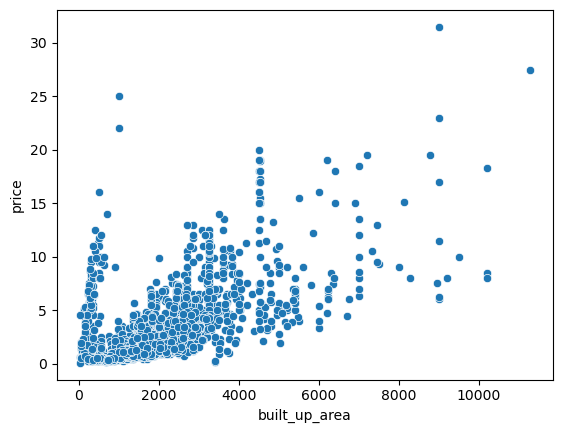

In [565]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [567]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [569]:
anamoly_df.sample(50)


,price,area,built_up_area
1839,10.50,3618.0,402.000000
3033,3.00,1950.0,1720.000000
2635,2.80,1867.0,1621.707067
93,2.79,1860.0,1569.159967
1475,3.00,1975.0,1753.396993
424,3.95,2343.0,1891.706905
1077,4.25,1600.0,1788.438581
1022,3.40,2200.0,1954.963207
2282,3.87,2250.0,1718.634322
3532,4.50,3150.0,14.000000


In [571]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [573]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

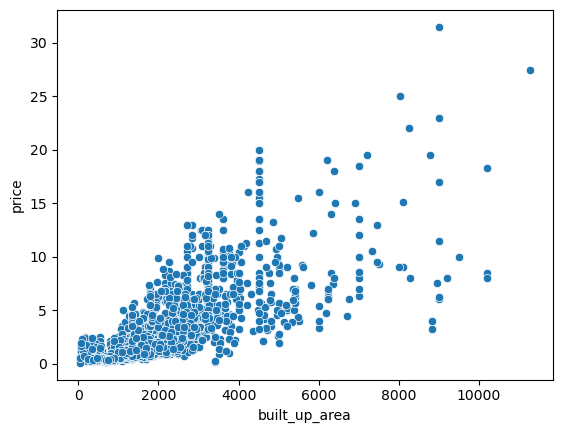

In [575]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])

In [577]:
# Dropping irrelevant columns
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [579]:
df.isnull().sum()

society               1
property_type         0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1028
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
puja room             0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [581]:
df['built_up_area'].isnull().sum()

0

### FloorNum Column

In [584]:
df[df['floorNum'].isnull()]


,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
156,ansal sushant lok,house,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,0,59
225,NaN,flat,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
237,independent,house,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
264,vipul tatvam villa,house,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
430,independent,house,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
898,independent,house,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
954,independent,house,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,0,0,0,0
1066,vipul tatvam villa,house,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,0,0,0,88
1160,independent,house,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1306,independent,house,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9


In [586]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [588]:
df['floorNum'].fillna(2.0,inplace=True)

/var/folders/3v/pb26c2zj6_v2h3f13gtgqw3w0000gn/T/ipykernel_80085/15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [590]:
df.isnull().sum()

society               1
property_type         0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1028
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
puja room             0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [592]:
df.drop(columns = ['facing'],inplace = True)

In [594]:
df.isnull().sum()

society            1
property_type      0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
puja room          0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [596]:
df[df['society'].isnull()]

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
225,NaN,flat,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [600]:
df.drop(index = 225, inplace = True)

In [602]:
df.isnull().sum()

society            0
property_type      0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
puja room          0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### Age possession column

In [605]:
df['agePossession'].value_counts()

agePossession
Relatively New        1610
New Property           562
Moderately Old         550
Undefined              303
Old Property           298
Under Construction     262
Name: count, dtype: int64

In [607]:
df[df['agePossession'] == 'Undefined']

,society,property_type,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,puja room,others,furnishing_type,luxury_score
7,sare crescent parc,flat,sector 92,0.95,5013.0,4,5,3+,13.0,Undefined,1895.000000,0,0,0,0,0,0,0
17,lavanya apartments,flat,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.000000,0,0,0,0,0,0,0
30,project mianwali colony,house,sector 12,1.70,9444.0,1,1,2,1.0,Undefined,1988.767187,0,0,0,0,0,0,0
37,assotech blith,flat,sector 99,1.60,6667.0,3,4,0,15.0,Undefined,2400.000000,0,0,0,0,0,0,51
48,smart world gems,flat,sector 89,0.88,7978.0,2,2,0,2.0,Undefined,1103.000000,0,0,0,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,dnha cghs,flat,sector 1,0.85,3864.0,3,3,0,5.0,Undefined,2200.000000,0,0,0,0,0,0,0
3485,independent,house,sector 105,1.15,3285.0,3,2,1,1.0,Undefined,3691.560338,0,0,0,0,0,0,0
3558,independent,house,sector 4,1.10,11111.0,6,4,1,2.0,Undefined,990.000000,0,0,0,0,0,0,0
3565,raheja vedaanta,flat,sector 108,1.50,5263.0,3,4,0,12.0,Undefined,2850.000000,0,0,0,0,0,0,0


In [615]:
# Replacing the missing value with the mode of the respective sector

def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [617]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [613]:
df['agePossession'].value_counts()

agePossession
Relatively New        1718
Moderately Old         600
New Property           598
Old Property           334
Under Construction     274
Undefined               61
Name: count, dtype: int64

In [619]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [621]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [623]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         607
New Property           599
Old Property           337
Under Construction     274
Undefined               38
Name: count, dtype: int64

In [625]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [627]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [629]:
df['agePossession'].value_counts()

agePossession
Relatively New        1734
Moderately Old         641
New Property           599
Old Property           337
Under Construction     274
Name: count, dtype: int64

In [631]:
df.isnull().sum()

society            0
property_type      0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
puja room          0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [633]:
df.to_csv('data_after_missing_value_treatment.csv',index=False)